<a href="https://colab.research.google.com/github/ptsnbkht/DI-Bootcamp/blob/main/XP_Exersise_Day3ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd

# Load the datasets
gender_submission_df = pd.read_csv('gender_submission.csv')
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

# Merge the datasets based on 'PassengerId'
# We'll perform a series of outer merges to keep all passengers from all datasets
merged_df = pd.merge(train_df, test_df, on='PassengerId', how='outer', suffixes=('_train', '_test'))
merged_df = pd.merge(merged_df, gender_submission_df, on='PassengerId', how='outer')

# Identify duplicate rows based on all columns
print(f"Shape before removing duplicates: {merged_df.shape}")

# Remove duplicate rows
merged_df_cleaned = merged_df.drop_duplicates()

# Verify the removal of duplicates
print(f"Shape after removing duplicates: {merged_df_cleaned.shape}")

# Check if the number of rows is different
if merged_df.shape[0] > merged_df_cleaned.shape[0]:
    print(f"Removed {merged_df.shape[0] - merged_df_cleaned.shape[0]} duplicate rows.")
else:
    print("No duplicate rows found.")

Shape before removing duplicates: (1309, 23)
Shape after removing duplicates: (1309, 23)
No duplicate rows found.


In [3]:

# Show missing values in a table
missing_values = merged_df_cleaned.isnull().sum().reset_index()
missing_values.columns = ['Header', 'Missing Values Count']
print("\nMissing Values Table:")
missing_values

,PassengerId,Survived_x,Pclass_train,Name_train,Sex_train,Age_train,SibSp_train,Parch_train,Ticket_train,Fare_train,...,Name_test,Sex_test,Age_test,SibSp_test,Parch_test,Ticket_test,Fare_test,Cabin_test,Embarked_test,Survived_y
0,1,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,0.0,3.0,"Moran, Mr. James",male,NaN,0.0,0.0,330877,8.4583,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:

import numpy as np
from sklearn.preprocessing import StandardScaler

# Create 'Family Size' column
# Assuming Family Size is SibSp + Parch + 1 (including the passenger)
# Use the train columns as they have values for the training set
merged_df_cleaned['Family Size'] = merged_df_cleaned['SibSp_train'].fillna(0) + merged_df_cleaned['Parch_train'].fillna(0) + 1

# Select numerical features for standardization
numerical_features = ['Age_train', 'SibSp_train', 'Parch_train', 'Fare_train', 'Age_test', 'SibSp_test', 'Parch_test', 'Fare_test', 'Family Size']

# Initialize the StandardScaler
scaler = StandardScaler()

# Create copies of the columns before filling NaN
# We do this to apply standardization to the original values and handle NaNs separately if needed later
cols_to_scale = [col for col in numerical_features if col in merged_df_cleaned.columns]
merged_df_scaled = merged_df_cleaned.copy()

# Apply standardization to the selected numerical features, handling NaN values by not scaling them
for col in cols_to_scale:
    # Select non-NaN values for scaling
    non_nan_values = merged_df_scaled[col][merged_df_scaled[col].notna()].values.reshape(-1, 1)
    if non_nan_values.size > 0:
        # Fit and transform the non-NaN values
        scaled_values = scaler.fit_transform(non_nan_values)
        # Replace the original non-NaN values with the scaled values
        merged_df_scaled.loc[merged_df_scaled[col].notna(), col] = scaled_values.flatten()

# Display the first few rows of the modified DataFrame with 'Family Size' and standardized features
print("\nDataFrame with 'Family Size' and Standardized Numerical Features:")
print(merged_df_scaled.head())

# Display the description of the standardized numerical features
print("\nDescription of Standardized Numerical Features:")
print(merged_df_scaled[cols_to_scale].describe())


DataFrame with 'Family Size' and Standardized Numerical Features:
   PassengerId  Survived_x  Pclass_train  \
0            1         0.0           3.0   
1            2         1.0           1.0   
2            3         1.0           3.0   
3            4         1.0           1.0   
4            5         0.0           3.0   

                                          Name_train Sex_train  Age_train  \
0                            Braund, Mr. Owen Harris      male  -0.530377   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    female   0.571831   
2                             Heikkinen, Miss. Laina    female  -0.254825   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    female   0.365167   
4                           Allen, Mr. William Henry      male   0.365167   

   SibSp_train  Parch_train      Ticket_train  Fare_train  ... Age_test  \
0     0.432793    -0.473674         A/5 21171   -0.502445  ...      NaN   
1     0.432793    -0.473674          PC 17599    0.7868

In [8]:

import numpy as np
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Function to detect outliers using Z-score
def detect_outliers_zscore(df, column, threshold=3):
    # Calculate Z-scores, ignoring NaNs
    df[f'{column}_zscore'] = (df[column] - df[column].mean()) / df[column].std()
    outliers = df[np.abs(df[f'{column}_zscore']) > threshold]
    return outliers

# Detect outliers in 'Fare_train' using IQR
print("\nOutliers in 'Fare_train' (IQR):")
outliers_fare_iqr = detect_outliers_iqr(merged_df_cleaned.dropna(subset=['Fare_train']), 'Fare_train') # Drop NaNs for calculation
print(outliers_fare_iqr[['PassengerId', 'Fare_train']])

# Detect outliers in 'Fare_train' using Z-score
print("\nOutliers in 'Fare_train' (Z-score):")
outliers_fare_zscore = detect_outliers_zscore(merged_df_cleaned.dropna(subset=['Fare_train']), 'Fare_train') # Drop NaNs for calculation
print(outliers_fare_zscore[['PassengerId', 'Fare_train', 'Fare_train_zscore']])
merged_df_cleaned = merged_df_cleaned.drop(columns=['Fare_train_zscore'], errors='ignore') # Clean up the zscore column

# Detect outliers in 'Age_train' using IQR
print("\nOutliers in 'Age_train' (IQR):")
outliers_age_iqr = detect_outliers_iqr(merged_df_cleaned.dropna(subset=['Age_train']), 'Age_train') # Drop NaNs for calculation
print(outliers_age_iqr[['PassengerId', 'Age_train']])

# Detect outliers in 'Age_train' using Z-score
print("\nOutliers in 'Age_train' (Z-score):")
outliers_age_zscore = detect_outliers_zscore(merged_df_cleaned.dropna(subset=['Age_train']), 'Age_train') # Drop NaNs for calculation
print(outliers_age_zscore[['PassengerId', 'Age_train', 'Age_train_zscore']])
merged_df_cleaned = merged_df_cleaned.drop(columns=['Age_train_zscore'], errors='ignore') # Clean up the zscore column


# Repeat for test columns if desired
# Detect outliers in 'Fare_test' using IQR
print("\nOutliers in 'Fare_test' (IQR):")
outliers_fare_test_iqr = detect_outliers_iqr(merged_df_cleaned.dropna(subset=['Fare_test']), 'Fare_test') # Drop NaNs for calculation
print(outliers_fare_test_iqr[['PassengerId', 'Fare_test']])

# Detect outliers in 'Fare_test' using Z-score
print("\nOutliers in 'Fare_test' (Z-score):")
outliers_fare_test_zscore = detect_outliers_zscore(merged_df_cleaned.dropna(subset=['Fare_test']), 'Fare_test') # Drop NaNs for calculation
print(outliers_fare_test_zscore[['PassengerId', 'Fare_test', 'Fare_test_zscore']])
merged_df_cleaned = merged_df_cleaned.drop(columns=['Fare_test_zscore'], errors='ignore') # Clean up the zscore column

# Detect outliers in 'Age_test' using IQR
print("\nOutliers in 'Age_test' (IQR):")
outliers_age_test_iqr = detect_outliers_iqr(merged_df_cleaned.dropna(subset=['Age_test']), 'Age_test') # Drop NaNs for calculation
print(outliers_age_test_iqr[['PassengerId', 'Age_test']])

# Detect outliers in 'Age_test' using Z-score
print("\nOutliers in 'Age_test' (Z-score):")
outliers_age_test_zscore = detect_outliers_zscore(merged_df_cleaned.dropna(subset=['Age_test']), 'Age_test') # Drop NaNs for calculation
print(outliers_age_test_zscore[['PassengerId', 'Age_test', 'Age_test_zscore']])
merged_df_cleaned = merged_df_cleaned.drop(columns=['Age_test_zscore'], errors='ignore') # Clean up the zscore column



Outliers in 'Fare_train' (IQR):
     PassengerId  Fare_train
1              2     71.2833
27            28    263.0000
31            32    146.5208
34            35     82.1708
52            53     76.7292
..           ...         ...
846          847     69.5500
849          850     89.1042
856          857    164.8667
863          864     69.5500
879          880     83.1583

[116 rows x 2 columns]

Outliers in 'Fare_train' (Z-score):
     PassengerId  Fare_train  Fare_train_zscore
27            28    263.0000           4.644393
88            89    263.0000           4.644393
118          119    247.5208           4.332899
258          259    512.3292           9.661740
299          300    247.5208           4.332899
311          312    262.3750           4.631815
341          342    263.0000           4.644393
377          378    211.5000           3.608038
380          381    227.5250           3.930516
438          439    263.0000           4.644393
527          528    221.7792  

<ipython-input-8-f1c6b648e732>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_zscore'] = (df[column] - df[column].mean()) / df[column].std()
<ipython-input-8-f1c6b648e732>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{column}_zscore'] = (df[column] - df[column].mean()) / df[column].std()
<ipython-input-8-f1c6b648e732>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [9]:

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Combine the Fare columns for min/max calculation
all_fares = pd.concat([merged_df_scaled['Fare_train'], merged_df_scaled['Fare_test']])

# Initialize the MinMaxScaler
minmax_scaler = MinMaxScaler()

# Fit the scaler on the combined non-NaN Fare data to get the min and max across both train and test sets
non_nan_fares = all_fares[all_fares.notna()].values.reshape(-1, 1)
if non_nan_fares.size > 0:
    minmax_scaler.fit(non_nan_fares)

    # Apply normalization to the Fare columns in the scaled dataframe
    # We need to handle NaNs during the transformation as well
    for col in ['Fare_train', 'Fare_test']:
        if col in merged_df_scaled.columns:
            # Select non-NaN values for transformation
            non_nan_values = merged_df_scaled[col][merged_df_scaled[col].notna()].values.reshape(-1, 1)
            if non_nan_values.size > 0:
                # Transform the non-NaN values
                normalized_values = minmax_scaler.transform(non_nan_values)
                # Replace the original non-NaN values with the normalized values
                merged_df_scaled.loc[merged_df_scaled[col].notna(), col] = normalized_values.flatten()

# Display the first few rows of the modified DataFrame with normalized features
print("\nDataFrame with Standardized and Normalized Numerical Features (Fare):")
print(merged_df_scaled.head())

# Display the description of the normalized numerical features
print("\nDescription of Normalized Numerical Features (Fare):")
print(merged_df_scaled[['Fare_train', 'Fare_test']].describe())



DataFrame with Standardized and Normalized Numerical Features (Fare):
   PassengerId  Survived_x  Pclass_train  \
0            1         0.0           3.0   
1            2         1.0           1.0   
2            3         1.0           3.0   
3            4         1.0           1.0   
4            5         0.0           3.0   

                                          Name_train Sex_train  Age_train  \
0                            Braund, Mr. Owen Harris      male  -0.530377   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    female   0.571831   
2                             Heikkinen, Miss. Laina    female  -0.254825   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    female   0.365167   
4                           Allen, Mr. William Henry      male   0.365167   

   SibSp_train  Parch_train      Ticket_train  Fare_train  ... Age_test  \
0     0.432793    -0.473674         A/5 21171    0.014151  ...      NaN   
1     0.432793    -0.473674          PC 17599    0.


Age Breakdown:
Age_Group
0-10      64
11-20    115
21-30    230
31-40    155
41-50     86
51-60     42
61-70     17
71-80      5
Name: count, dtype: int64


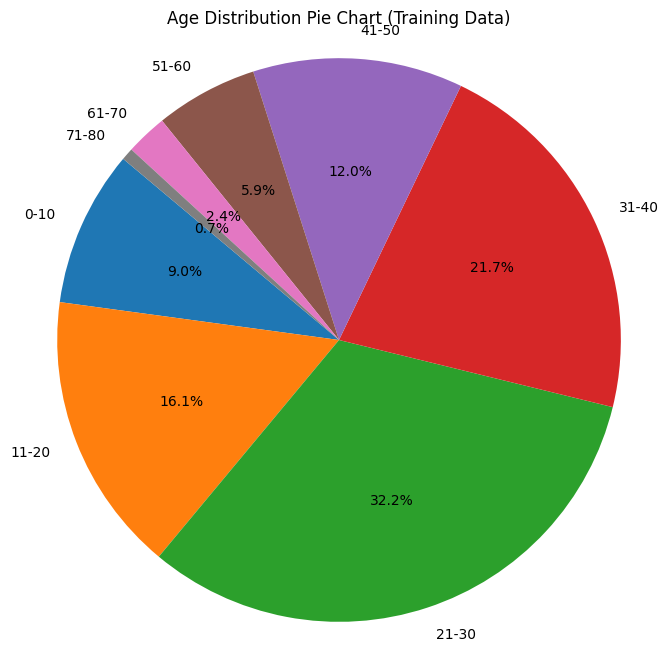

In [43]:
# prompt: please use test.csv and create a breadown based on Age with a pie chart

import pandas as pd
!pip install matplotlib seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# For this task, we will use the 'Age_train' column as it contains age data for the training set.
# If you intended to use a different Age column or a combined one, please specify.

# Drop rows where 'Age_train' is NaN for the breakdown
age_breakdown = train_df.dropna(subset=['Age']).copy()

# Define age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']

# Categorize ages into bins
age_breakdown['Age_Group'] = pd.cut(age_breakdown['Age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)

# Count the occurrences in each age group
age_counts = age_breakdown['Age_Group'].value_counts().sort_index()

print("\nAge Breakdown:")
print(age_counts)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution Pie Chart (Training Data)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()